In [1]:
from cognis.memory.loader import load_text_documents

docs = load_text_documents("data/sample/personal_notes.txt", persona="self.personal")
len(docs), type(docs), docs[:1]


c:\MINICONDA\envs\stable\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(1,
 list,
 [Document(metadata={'source': 'C:\\cognis\\data\\sample\\personal_notes.txt', 'persona': 'self.personal'}, page_content='I have been struggling with consistency in my learning journey.\nSome days I feel extremely motivated, but on other days I feel overwhelmed and distracted.\n\nI often overthink whether I am doing enough.\nI want to build systems that help me reflect, stay focused, and grow steadily.\n\nRecently, I have also been thinking a lot about building meaningful AI projects\nthat feel personal rather than generic tutorials.\n')])

In [2]:
from cognis.memory.chunker import chunk_documents

chunks = chunk_documents(docs)
len(chunks)


1

In [3]:
from cognis.memory.embeddings import get_embedding_model
from cognis.memory.vectorstore import build_vector_store

embeddings = get_embedding_model()
vector_store = build_vector_store(chunks, embeddings)


C:\cognis\src\cognis\memory\embeddings.py:11: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  return HuggingFaceEmbeddings(


In [4]:
from cognis.memory.retriever import get_retriever

retriever = get_retriever(vector_store)
results = retriever.invoke("What am I struggling with?")
results


[Document(id='5f6164e4-dc8d-424e-a004-5c0cec3d6b81', metadata={'source': 'C:\\cognis\\data\\sample\\personal_notes.txt', 'persona': 'self.personal'}, page_content='I have been struggling with consistency in my learning journey.\nSome days I feel extremely motivated, but on other days I feel overwhelmed and distracted.\n\nI often overthink whether I am doing enough.\nI want to build systems that help me reflect, stay focused, and grow steadily.\n\nRecently, I have also been thinking a lot about building meaningful AI projects\nthat feel personal rather than generic tutorials.')]

In [5]:
from cognis.reasoning.reflection_chain import build_reflection_chain

reflection = build_reflection_chain(retriever)

response = reflection.invoke(
    "What am I struggling with, and why does it keep repeating?"
)

response


C:\cognis\src\cognis\reasoning\llm.py:9: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the `langchain-ollama package and should be used instead. To use it run `pip install -U `langchain-ollama` and import as `from `langchain_ollama import ChatOllama``.
  return ChatOllama(


AIMessage(content="\n---------\n1. LOOP DETECTION\nIt seems that you are struggling with consistency in your learning journey. This issue has appeared multiple times in the past.\n\n2. ROOT CAUSE ANALYSIS\nThe root cause of this recurring problem is a combination of overthinking and feeling overwhelmed. You often question whether you're doing enough, which leads to self-doubt and distraction. \n\n3. INTERVENTION STRATEGY\nTo address this issue, try the following:\na) Break down your learning goals into smaller, manageable tasks. This will help reduce overwhelm and increase focus.\nb) Practice mindfulness or meditation to calm your mind and improve concentration.\nc) Create a schedule that includes regular breaks to prevent burnout.\nd) Seek support from peers or mentors who can provide guidance and motivation.\n\n4. REFRAME\nInstead of viewing this struggle as a personal failure, reframe it as an opportunity for growth. Recognize that setbacks are part of the learning process and focus

In [6]:
from cognis.reasoning.self_reflection import reflect_and_store

answer = reflect_and_store(
    question="Why do I keep struggling with consistency?",
    retriever=retriever,
    vector_store=vector_store
)

answer


'\n---------\n1. LOOP DETECTION\nThe issue you are facing with consistency appears to be recurring in your learning journey. You have mentioned that some days you feel extremely motivated, while on other days you feel overwhelmed and distracted. This pattern suggests a possible cycle of motivation and demotivation.\n\n2. ROOT CAUSE ANALYSIS\nThe root cause of this issue could be related to the balance between your desire for growth and your fear of failure. It\'s common to struggle with consistency when there is pressure to achieve certain goals, as it can lead to self-doubt and anxiety. This may result in alternating periods of high motivation and low motivation.\n\n3. INTERVENTION STRATEGY\nTo address this issue, you could try implementing the "FOMO" (Fear Of Missing Out) strategy. This involves setting specific goals for each day or week and rewarding yourself when you achieve them. Additionally, it\'s important to remind yourself that learning is a process, and setbacks are part of

In [7]:
type(answer), answer[:300]


(str,
 '\n---------\n1. LOOP DETECTION\nThe issue you are facing with consistency appears to be recurring in your learning journey. You have mentioned that some days you feel extremely motivated, while on other days you feel overwhelmed and distracted. This pattern suggests a possible cycle of motivation and d')

In [8]:
# Ask again after reflection has been stored
results = retriever.invoke("Why do I keep struggling with consistency?")
results


[Document(id='8bfa5afa-b8aa-4240-9889-151dc8acbd88', metadata={'source': 'self_reflection', 'question': 'Why do I keep struggling with consistency?', 'timestamp': '2026-01-15T15:01:28.504491'}, page_content='\n---------\n1. LOOP DETECTION\nThe issue you are facing with consistency appears to be recurring in your learning journey. You have mentioned that some days you feel extremely motivated, while on other days you feel overwhelmed and distracted. This pattern suggests a possible cycle of motivation and demotivation.\n\n2. ROOT CAUSE ANALYSIS\nThe root cause of this issue could be related to the balance between your desire for growth and your fear of failure. It\'s common to struggle with consistency when there is pressure to achieve certain goals, as it can lead to self-doubt and anxiety. This may result in alternating periods of high motivation and low motivation.\n\n3. INTERVENTION STRATEGY\nTo address this issue, you could try implementing the "FOMO" (Fear Of Missing Out) strategy

In [9]:
answer_2 = reflect_and_store(
    question="Why do I keep struggling with consistency?",
    retriever=retriever,
    vector_store=vector_store
)

answer_2


' \n--------------\nYour question is about your struggles with consistency in learning. It seems that this issue has been recurring throughout your learning journey. You have mentioned that some days you feel extremely motivated, while on other days you feel overwhelmed and distracted. This suggests a pattern of motivation and demotivation.\n\nThe root cause of this issue could be related to the balance between your desire for growth and your fear of failure. It\'s common to struggle with consistency when there is pressure to achieve certain goals, as it can lead to self-doubt and anxiety. This may result in alternating periods of high motivation and low motivation.\n\nTo address this issue, I suggest implementing the "FOMO" strategy. This involves setting specific goals for each day or week and rewarding yourself when you achieve them. Additionally, it\'s important to remind yourself that learning is a process, and setbacks are part of growth. By focusing on small, achievable tasks an

In [10]:
meta = reflect_and_store(
    question="Have I already identified this problem before?",
    retriever=retriever,
    vector_store=vector_store
)

meta


'\n--------------\nLOOP DETECTION \nYes, it seems that you have already identified this problem before. You mentioned that some days you feel extremely motivated, while on other days you feel overwhelmed and distracted. This suggests a recurring pattern of motivation and demotivation in your learning journey.\n\nROOT CAUSE ANALYSIS \nThe root cause of this issue could be related to the balance between your desire for growth and your fear of failure. It\'s common to struggle with consistency when there is pressure to achieve certain goals, as it can lead to self-doubt and anxiety. This may result in alternating periods of high motivation and low motivation.\n\nINTERVENTION STRATEGY \nTo address this issue, you could try implementing the "FOMO" strategy. This involves setting specific goals for each day or week and rewarding yourself when you achieve them. Additionally, it\'\n\n'

In [11]:
from cognis.reasoning.pattern_scoring import score_patterns

pattern_report = score_patterns(
    retriever=retriever,
    query="consistency in learning"
)

pattern_report


{'status': 'patterns_detected',
 'query': 'consistency in learning',
 'total_related_memories': 4,
 'patterns': [{'pattern': '--------------\nyour question is about your struggles with consistency in learning. it seems that this issue has been recurring throughout your learning journey. you have mentioned that some days you feel extremely motivated, while on other days you feel overwhelmed and distracted. this suggests a pattern of motivation and demotivation.\n\nthe root cause of this issue could be related to the balance between your desire for growth and your fear of failure. it\'s common to struggle with consistency when there is pressure to achieve certain goals, as it can lead to self-doubt and anxiety. this may result in alternating periods of high motivation and low motivation.\n\nto address this issue, i suggest implementing the "fomo" strategy. this involves setting specific goals for each day or week and rewarding yourself when you achieve them. additionally, it\'s important

In [12]:
from cognis.reasoning.intervention import generate_intervention

top_pattern = pattern_report["patterns"][0]

intervention = generate_intervention(
    pattern=top_pattern["pattern"],
    frequency=top_pattern["frequency"]
)

intervention


AIMessage(content=" \nThank you for sharing your thoughts with me. It's great that you are reflecting on your learning journey and seeking ways to improve consistency.\n\n1. The pattern of motivation and demotivation may be repeating due to the internal conflict between the desire for growth and the fear of failure. This can create a cycle of alternating periods of high and low motivation.\n\n2. One small, concrete intervention could be creating a daily or weekly learning schedule. By setting specific goals for each day or week and allocating dedicated time for learning, you can establish a routine that promotes consistency. Additionally, breaking down larger tasks into smaller, manageable chunks can make them feel less overwhelming and increase motivation.\n\n3. It's important to approach this issue with self-compassion and understanding. Instead of blaming yourself for not being consistent, acknowledge that setbacks are a natural part of the learning process. Remind yourself that pro

In [13]:
from cognis.reasoning.temporal_patterns import track_pattern_over_time

history = retriever.invoke("consistency")

temporal_report = track_pattern_over_time(history)
temporal_report


[{'pattern': ' \n--------------\nyour question is about your struggles with consistency in learning. it seems that this issue has been recurring throughout your learning journey. you have mentioned that some days you feel extremely motivated, while on other days you feel overwhelmed and distracted. this suggests a pattern of motivation and demotivation.\n\nthe root cause of this issue could be related to the balance between your desire for growth and your fear of failure. it\'s common to struggle with consistency when there is pressure to achieve certain goals, as it can lead to self-doubt and anxiety. this may result in alternating periods of high motivation and low motivation.\n\nto address this issue, i suggest implementing the "fomo" strategy. this involves setting specific goals for each day or week and rewarding yourself when you achieve them. additionally, it\'s important to remind yourself that learning is a process, and setbacks are part of growth. by focusing on small, achiev

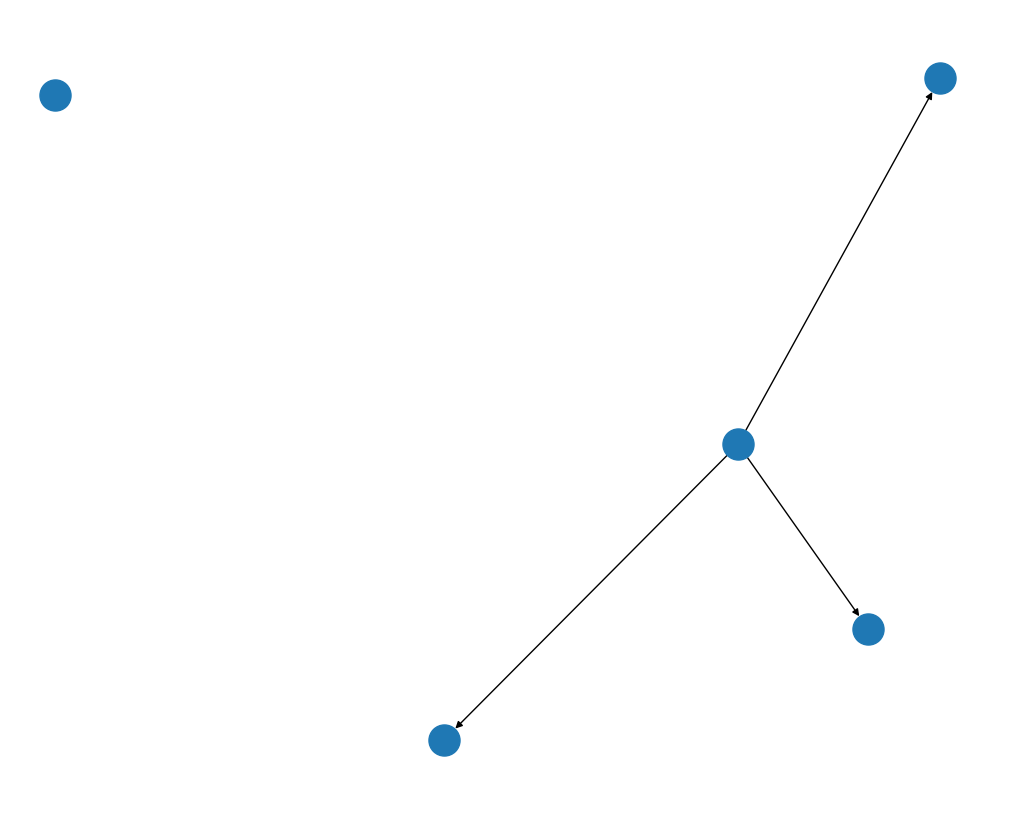

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from cognis.reasoning.thought_graph import build_thought_graph

graph_docs = retriever.invoke("learning")
G = build_thought_graph(graph_docs)

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=False, node_size=500)
plt.show()


In [16]:
results = retriever.invoke("Why do I keep struggling with consistency?")
results

[Document(id='8bfa5afa-b8aa-4240-9889-151dc8acbd88', metadata={'source': 'self_reflection', 'question': 'Why do I keep struggling with consistency?', 'timestamp': '2026-01-15T15:01:28.504491'}, page_content='\n---------\n1. LOOP DETECTION\nThe issue you are facing with consistency appears to be recurring in your learning journey. You have mentioned that some days you feel extremely motivated, while on other days you feel overwhelmed and distracted. This pattern suggests a possible cycle of motivation and demotivation.\n\n2. ROOT CAUSE ANALYSIS\nThe root cause of this issue could be related to the balance between your desire for growth and your fear of failure. It\'s common to struggle with consistency when there is pressure to achieve certain goals, as it can lead to self-doubt and anxiety. This may result in alternating periods of high motivation and low motivation.\n\n3. INTERVENTION STRATEGY\nTo address this issue, you could try implementing the "FOMO" (Fear Of Missing Out) strategy